# SecurePay — Intelligent Transaction Anomaly Detection System

## Notebook 01 — Transaction Data Exploration

---

## Introduction

The **SecurePay — Intelligent Transaction Anomaly Detection System** is designed to analyze financial transaction data and identify suspicious or abnormal behavior within a large stream of normal activity.

In real-world financial environments, the majority of transactions are legitimate, while fraudulent or suspicious events occur very rarely. Even though these events are few, they can cause serious financial and operational risk. Therefore, understanding the dataset clearly before building any detection model is an essential first step.

This notebook focuses on exploring the SecurePay transaction dataset to verify its structure, examine behavioral patterns, and ensure data consistency. The goal at this stage is not to build any machine learning model, but to understand how normal and suspicious transactions differ in terms of timing, transaction amount, and behavioral indicators.

The insights obtained from this exploration will form the foundation for building an effective anomaly detection system in the upcoming notebooks.

---

## Dataset Loading and Initial Inspection

The dataset is loaded and inspected to confirm that it is accessible, structured correctly, and contains valid values for analysis.


#Stage 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("securepay_txn_stream.csv")
df.head()


,txn_id,txn_hour,txn_amount,amount_deviation,txn_velocity,behavior_score,payment_channel,risk_flag
0,TXN00001,17,222.39,-0.30,0.75,0.33,CreditCard,0
1,TXN00002,21,991.00,-0.06,0.46,0.32,UPI,0
2,TXN00003,10,566.06,-0.27,0.59,0.17,CreditCard,0
3,TXN00004,8,320.76,-0.34,0.56,0.08,UPI,0
4,TXN00005,16,1047.68,0.27,0.13,0.29,CreditCard,0


#Stage 2

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   txn_id            10000 non-null  object 
 1   txn_hour          10000 non-null  int64  
 2   txn_amount        10000 non-null  float64
 3   amount_deviation  10000 non-null  float64
 4   txn_velocity      10000 non-null  float64
 5   behavior_score    10000 non-null  float64
 6   payment_channel   10000 non-null  object 
 7   risk_flag         10000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


,txn_hour,txn_amount,amount_deviation,txn_velocity,behavior_score,risk_flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.787400,836.369286,0.042591,0.511774,0.210008,0.015000
std,4.576712,1247.969932,0.475715,0.543276,0.120500,0.121559
min,0.000000,200.030000,-0.500000,0.100000,0.050000,0.000000
25%,11.000000,452.862500,-0.250000,0.280000,0.130000,0.000000
50%,15.000000,696.080000,0.000000,0.450000,0.200000,0.000000
75%,19.000000,947.930000,0.260000,0.630000,0.280000,0.000000
max,22.000000,14983.060000,3.990000,5.980000,1.000000,1.000000


#Stage 3


In [3]:
df['risk_flag'].value_counts()


,count
risk_flag,
0,9850
1,150


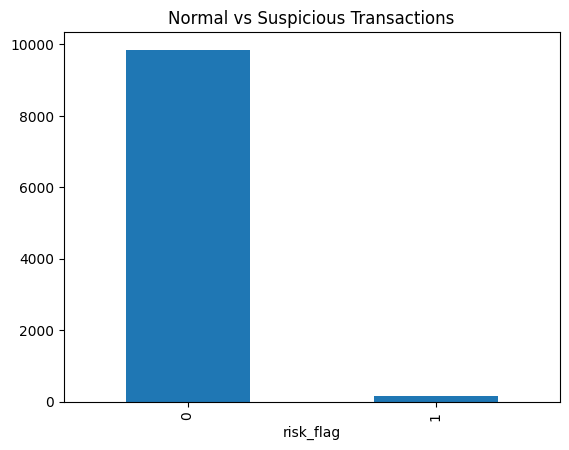

In [4]:
df['risk_flag'].value_counts().plot(kind='bar')
plt.title("Normal vs Suspicious Transactions")
plt.show()


#Stage 4

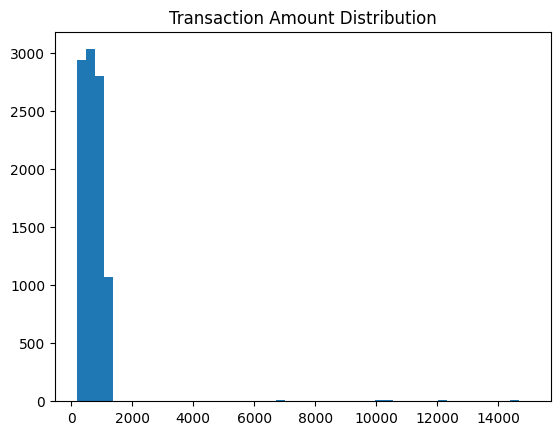

In [5]:
plt.hist(df['txn_amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


#Stage 5

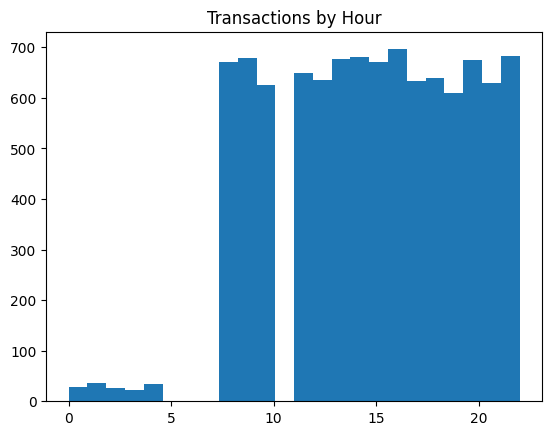

In [6]:
plt.hist(df['txn_hour'], bins=24)
plt.title("Transactions by Hour")
plt.show()


#Stage 6

In [7]:
df[df['risk_flag'] == 1].head(10)


,txn_id,txn_hour,txn_amount,amount_deviation,txn_velocity,behavior_score,payment_channel,risk_flag
9850,TXN09851,2,10778.93,3.03,4.00,0.87,UPI,1
9851,TXN09852,0,6865.35,2.35,4.26,1.00,CreditCard,1
9852,TXN09853,4,10267.06,3.17,4.09,0.93,UPI,1
9853,TXN09854,4,7216.05,3.24,3.07,0.97,CreditCard,1
9854,TXN09855,0,11651.40,3.65,3.97,0.83,UPI,1
9855,TXN09856,2,14118.99,3.50,4.54,0.90,CreditCard,1
9856,TXN09857,3,14525.40,2.65,5.64,0.98,CreditCard,1
9857,TXN09858,1,9506.99,2.15,4.12,0.91,UPI,1
9858,TXN09859,0,13318.00,2.84,4.53,0.83,UPI,1
9859,TXN09860,1,10428.19,3.45,5.43,0.97,UPI,1


## Observations

- The dataset contains approximately 10,000 transaction records.  
- Most transactions are normal, while suspicious transactions form a very small portion (~1–2%).  
- The dataset is highly imbalanced, which makes anomaly detection more suitable than traditional classification methods.  
- Most transactions occur during standard operational hours, while suspicious activity tends to appear during unusual time periods.  
- Suspicious transactions generally involve higher transaction amounts, increased activity velocity, and elevated behavioral risk indicators.  
- The dataset appears clean, consistent, and suitable for anomaly detection modelling.  

---

## Conclusion

This notebook successfully examined the structure and behavioral characteristics of the SecurePay transaction dataset. The analysis confirms that suspicious transactions are rare but behaviorally distinct from normal activity.

Key observations such as transaction imbalance, unusual timing patterns, and elevated behavioral indicators validate that the dataset is appropriate for anomaly detection techniques. With the dataset verified and behavioral patterns understood, the next step is to prepare the data for modelling by conditioning and transforming behavioral features for anomaly detection algorithms.
